![texto alternativo](https://drive.google.com/uc?id=1_ZoJOp39dxsRTVndJP1_7jdY7oGi8sSu) 

<h1><center>Redes Neuronales con Keras y Scikit</center></h1>


<center><i>Creando nuestra primera red neuronal</i></center>

# <h1>Contenido</h1>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <ol>
        <li><a href="#problema">Contexto Analítico</a></li>          
        <li><a href="#arquitectura">Arquitectura propuesta</a></li>
        <li><a href="#keras">Entrenamiento y Evaluación del Modelo</a></li>
    </ol>
</div>
<br>
<hr>

# <h1 id="problema">Contexto analítico</h1>

Requerimos diseñar un modelo que permita determinar el precio medio de las viviendas en Boston, para ello contamos con un set de información disponible en Keras con características y precios de viviendas en diferentes ubicaciones de Boston de finales de 1970. (Mayor detalle disponible en http://lib.stat.cmu.edu/datasets/boston 

En total contamos con 506 muestras caracterizadas por 13 variables. 


 Variables | Description
 --- | ---
 CRIM   |  per capita crime rate by town
 ZN     |  proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS  |  proportion of non-retail business acres per town
 CHAS   |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX    |  nitric oxides concentration (parts per 10 million)
 RM     |  average number of rooms per dwelling
 AGE    |  proportion of owner-occupied units built prior to 1940
 DIS    |  weighted distances to five Boston employment centres
 RAD    |  index of accessibility to radial highways
 TAX    |  full-value property-tax rate per \$10,000
 PTRATIO|  pupil-teacher ratio by town
 B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT  |  % lower status of the population
 MEDV   |  Median value of owner-occupied homes in $1000's

In [1]:
%tensorflow_version 1.x
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2,seed=10)

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
print("Tamaño set de entrenamiento:",x_train.shape)
print("Tamaño set de prueba:",x_test.shape)

Tamaño set de entrenamiento: (404, 13)
Tamaño set de prueba: (102, 13)


In [3]:
x_train[:1]

array([[5.4790e-02, 3.3000e+01, 2.1800e+00, 0.0000e+00, 4.7200e-01,
        6.6160e+00, 5.8100e+01, 3.3700e+00, 7.0000e+00, 2.2200e+02,
        1.8400e+01, 3.9336e+02, 8.9300e+00]])

# <h1 id="arquitectura">Arquitectura propuesta</h1>

Para diseñar el modelo implementaremos un red tal y como se ilustra enseguida:

![Arquitectura1](https://drive.google.com/uc?id=1RndIWQ4yVr9AvWi6Zbn6QNRpAJf33VeV)

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

#Definición de la arquitectura
model = Sequential()
model.add(Dense(13, input_dim=13, kernel_initializer='normal',activation='relu'))
model.add(Dense(6, kernel_initializer='normal',activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])

In [5]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 84        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________
None


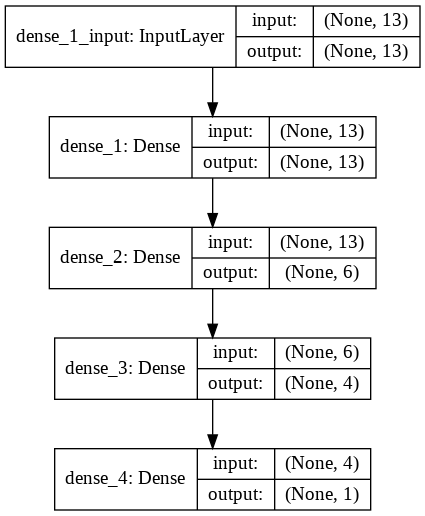

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

# <h1 id="keras">Entrenamiento y Evaluación del modelo</h1>

Ahora realizaremos diferentes entrenamientos de la red neuronal diseña y evaluaremos su desempeño.

In [7]:
#Entrena el modelo
x_val = x_train[300:,]
y_val = y_train[300:,]
#Entrena el modelo
model.fit(x_train, y_train, batch_size=32, epochs=5,validation_data=(x_val,y_val))




Train on 404 samples, validate on 104 samples
Epoch 1/5





404/404 [==============================] - 0s 664us/step - loss: 590.2963 - mean_absolute_percentage_error: 99.9549 - val_loss: 536.3224 - val_mean_absolute_percentage_error: 99.8667
Epoch 2/5
404/404 [==============================] - 0s 55us/step - loss: 588.8014 - mean_absolute_percentage_error: 99.7494 - val_loss: 534.0660 - val_mean_absolute_percentage_error: 99.5441
Epoch 3/5
404/404 [==============================] - 0s 46us/step - loss: 585.4269 - mean_absolute_percentage_error: 99.2985 - val_loss: 529.2468 - val_mean_absolute_percentage_error: 98.8531
Epoch 4/5
404/404 [==============================] - 0s 49us/step - loss: 578.1741 - mean_absolute_percentage_error: 98.3385 - val_loss: 518.9004 - val_mean_absolute_percentage_error: 97.3557
Epoch 5/5
404/404 [==============================] - 0s 57us/step - loss: 562.9875 - mean_absolute_percentage_error: 96.2747 - val_loss: 498.3383 - val_mean_absolute_percentage_

In [8]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

102/102 [==============================] - 0s 49us/step
loss  :  555.0107613357843
mean_absolute_percentage_error  :  94.91649134018841


In [9]:
model.fit(x_train, y_train, batch_size=32, epochs=100,validation_data=(x_val,y_val))

Train on 404 samples, validate on 104 samples
Epoch 1/100
404/404 [==============================] - 0s 53us/step - loss: 533.9964 - mean_absolute_percentage_error: 92.3868 - val_loss: 461.5552 - val_mean_absolute_percentage_error: 88.7080
Epoch 2/100
404/404 [==============================] - 0s 49us/step - loss: 485.9300 - mean_absolute_percentage_error: 85.0676 - val_loss: 402.7780 - val_mean_absolute_percentage_error: 79.1664
Epoch 3/100
404/404 [==============================] - 0s 53us/step - loss: 412.5710 - mean_absolute_percentage_error: 74.2137 - val_loss: 322.2709 - val_mean_absolute_percentage_error: 66.1461
Epoch 4/100
404/404 [==============================] - 0s 46us/step - loss: 318.3944 - mean_absolute_percentage_error: 60.9536 - val_loss: 230.5976 - val_mean_absolute_percentage_error: 52.0599
Epoch 5/100
404/404 [==============================] - 0s 46us/step - loss: 223.1876 - mean_absolute_percentage_error: 50.1679 - val_loss: 157.0621 - val_mean_absolute_percentage

In [10]:
results = model.evaluate(x_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

102/102 [==============================] - 0s 44us/step
loss  :  50.6888801724303
mean_absolute_percentage_error  :  21.913452185836494


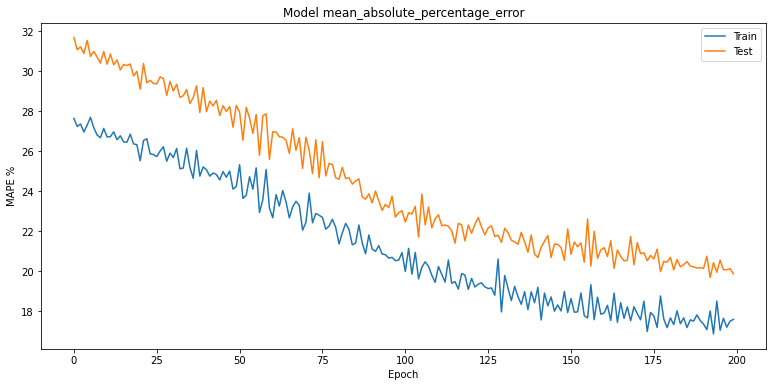

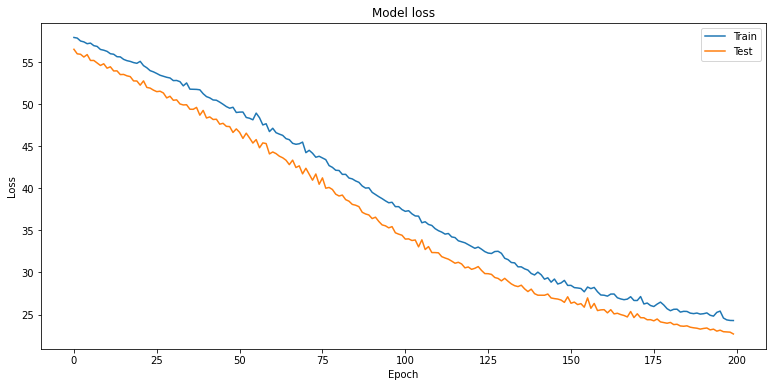

In [11]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, batch_size=32, epochs=200,validation_data=(x_val,y_val), verbose=0)
# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

**Happy Coding!**